# Sales Prediction Model

This project aims to build a model that can predict the expected amount in sales based on the amount spent on different forms of advertising

Import necessary libraries

In [4]:
import numpy as np
import pandas as pd
from pandas import read_csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

Load the Dataset

In [6]:
raw_data = pd.read_csv("sales_prediction_dataset.csv", encoding = 'latin1')
raw_data.head()

TV  Radio  Newspaper  Sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3   12.0
3  151.5   41.3       58.5   16.5
4  180.8   10.8       58.4   17.9

In [7]:
raw_data.shape

(200, 4)

Check the data type

In [9]:
dataset = raw_data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Check for null values

In [11]:
dataset.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

Check for duplicates

In [13]:
dataset.duplicated().sum()

0

#### Begin Exploratory Analysis to determine the features of the model

In [15]:
dataset.describe()

TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000

##### Distribution of TV

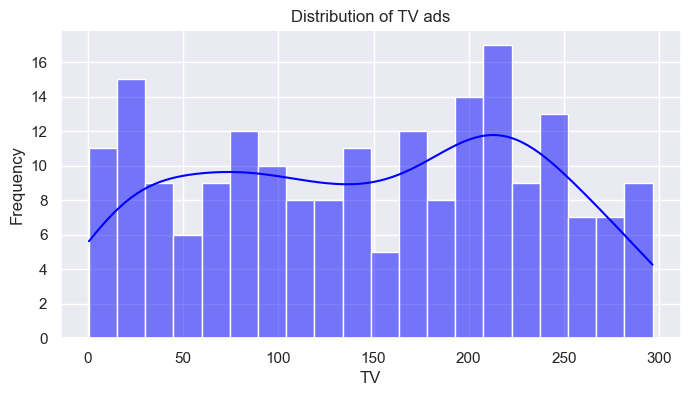

In [17]:
sns.set()
plt.figure(figsize=(8, 4)) 
sns.histplot(dataset['TV'], kde=True, bins=20, color='blue')

plt.title('Distribution of TV ads')
plt.xlabel('TV')
plt.ylabel('Frequency')
plt.show()

Check for a correlation between TV and Sales

<function matplotlib.pyplot.show(close=None, block=None)>

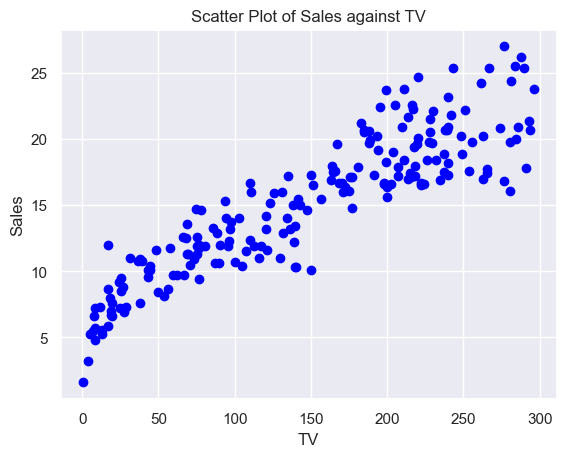

In [19]:
x = dataset['TV']
y = dataset['Sales']

plt.scatter(x, y, color = 'blue')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot of Sales against TV')

plt.show

In [20]:
correlation = dataset['TV'].corr(dataset['Sales'])
print('Correlation coefficient', correlation)

Correlation coefficient 0.9012079133023306


It is observed that TV advertising is the most effective in boosting sales. Larger amounts spent on TV advertising led to more sales

##### Distribution of Radio

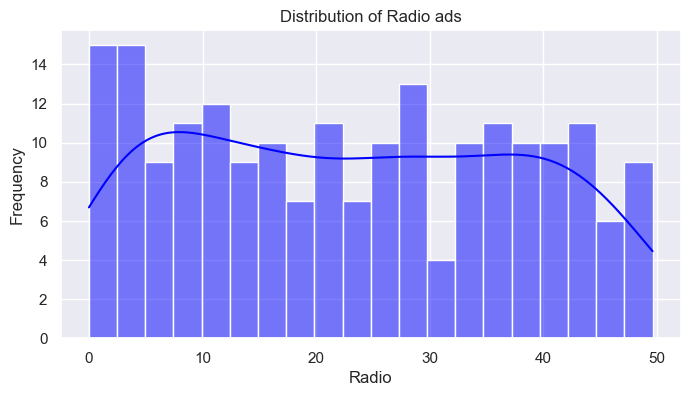

In [23]:
sns.set()
plt.figure(figsize=(8, 4)) 
sns.histplot(dataset['Radio'], kde=True, bins=20, color='blue')

plt.title('Distribution of Radio ads')
plt.xlabel('Radio')
plt.ylabel('Frequency')
plt.show()

Check for a correlation between Radio and Sales

<function matplotlib.pyplot.show(close=None, block=None)>

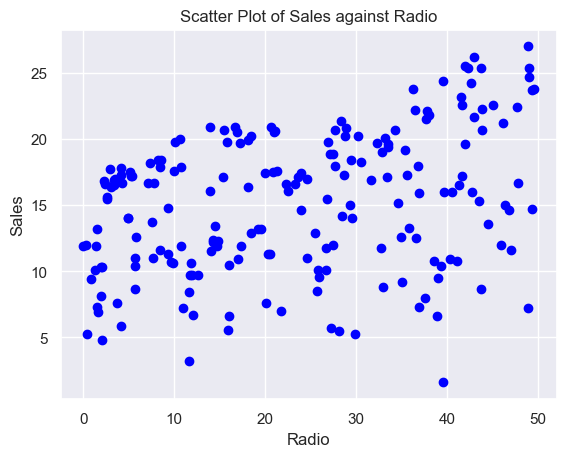

In [25]:
x = dataset['Radio']
y = dataset['Sales']

plt.scatter(x, y, color = 'blue')

plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Scatter Plot of Sales against Radio')
plt.show

In [26]:
correlation = dataset['Radio'].corr(dataset['Sales'])
print('Correlation coefficient', correlation)

Correlation coefficient 0.3496310970076693


There is a weak positive correlation between amount spent on Radio ads and Sales

##### Distribution of Newspaper

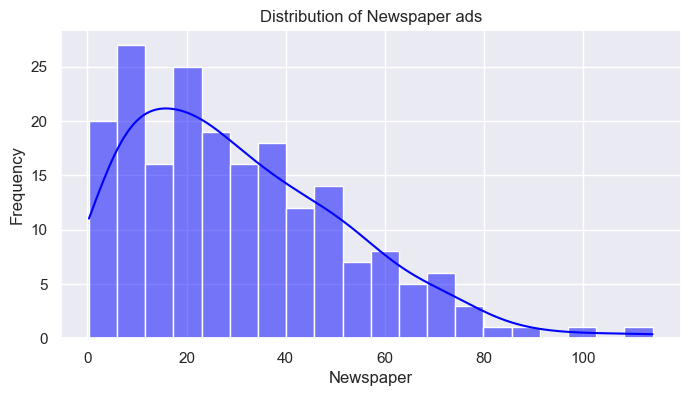

In [29]:
sns.set()
plt.figure(figsize=(8, 4)) 
sns.histplot(dataset['Newspaper'], kde=True, bins=20, color='blue')

plt.title('Distribution of Newspaper ads')
plt.xlabel('Newspaper')
plt.ylabel('Frequency')
plt.show()

It is observed that the distribution of newspaper is skewed to the right. Large amounts are not spent on newspaper advertising

Check for a correlation between amount spent on Newspaper ads and Sales

<function matplotlib.pyplot.show(close=None, block=None)>

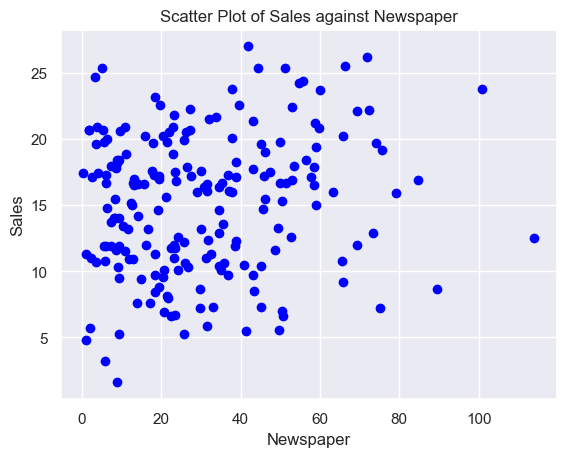

In [32]:
x = dataset['Newspaper']
y = dataset['Sales']

plt.scatter(x, y, color = 'blue')

plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Scatter Plot of Sales against Newspaper')
plt.show

In [33]:
correlation = dataset['Newspaper'].corr(dataset['Sales'])
print('Correlation coefficient', correlation)

Correlation coefficient 0.15796002615492621


There is a very weak correlation

##### Insights

- More money can be invested into TV advertising as it was the most effective in increasing sales
- Investing in newspaper advertising should be done with caution as there are few occurences of large amounts being spent on it and sales performed less than the median in such cases

#### Train the model

Import necessary libraries for a random forest regressor

In [39]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
df = dataset

Split data into features the split them into training and testing sets

In [41]:
X = df.drop(columns = ['Sales'])
y = df['Sales']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Train the model

In [43]:
model = RandomForestRegressor(n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

Make predictions and calculate accuracy

In [45]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print('r2 Score: ', r2)

r2 Score:  0.9402075483725679
